# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance (accuracy, precision, recall, and f-score) as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client for a any sepcific number of clients of your choice. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random


np.random.seed(2243313) # Set seed for numpy. Put your SID instead of number '42'
random.seed(2243313) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(2243313) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model




11490434/11490434 [==============================] - 0s 0us/step


2 Clients

In [2]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=2243313)

print(x_train_c1.shape)
print(x_train_c2.shape)
print(y_train_c1.shape)
print(y_train_c2.shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)



(30000, 28, 28, 1)
(30000, 28, 28, 1)
(30000,)
(30000,)


In [3]:
# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


313/313 - 2s - loss: 0.4435 - accuracy: 0.8639 - 2s/epoch - 5ms/step
Test accuracy: 0.8639000058174133


In [4]:
test_accuracy = []


In [5]:
test_accuracy.append(0.8652999997138977)
test_accuracy

[0.8652999997138977]

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 1s 3ms/step
(10000, 10)


In [8]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.31      0.48       980
           1       0.97      0.98      0.98      1135
           2       0.83      0.97      0.90      1032
           3       0.87      0.94      0.91      1010
           4       0.98      0.85      0.91       982
           5       0.75      0.91      0.82       892
           6       0.68      0.98      0.80       958
           7       0.89      0.95      0.92      1028
           8       0.95      0.84      0.89       974
           9       0.92      0.87      0.89      1009

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.85     10000
weighted avg       0.89      0.86      0.85     10000



In [9]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

Accuracy test set:  0.8639
Precision test set:  0.8851765752731832
Recall test set:  0.8639
F-score test set:  0.8524681215604153


In [10]:
test_precision = []
test_recall    = []
test_f1_score  = []

In [11]:
test_precision.append(0.8856584458216805)
test_recall.append(0.8653)
test_f1_score.append(0.8554286671379913)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

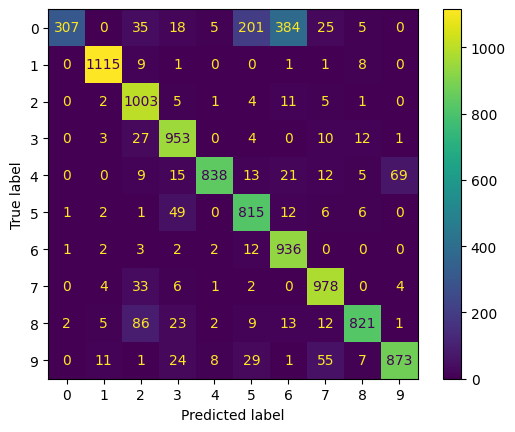

In [13]:
# display confusion matrix between test output and predicted output

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot();
#plt.show()

4 Clients

In [14]:
# Split data into 4 clients

In [15]:
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [16]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [17]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])

In [18]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights


In [19]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [20]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 2.2251 - accuracy: 0.3984 - 737ms/epoch - 2ms/step
Test accuracy: 0.3984000086784363


In [21]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [22]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

Accuracy test set:  0.3984
Precision test set:  0.36756040425356656
Recall test set:  0.3984
F-score test set:  0.36215371297003246
              precision    recall  f1-score   support

           0       0.34      0.18      0.24       980
           1       0.60      0.90      0.72      1135
           2       0.32      0.61      0.42      1032
           3       0.35      0.55      0.43      1010
           4       0.58      0.46      0.51       982
           5       0.36      0.16      0.22       892
           6       0.36      0.44      0.40       958
           7       0.38      0.39      0.39      1028
           8       0.24      0.17      0.20       974
           9       0.11      0.02      0.03      1009

    accuracy                           0.40     10000
   macro avg       0.36      0.39      0.36     10000
weighted avg       0.37      0.40      0.36     10000



In [23]:
test_accuracy.append(0.3984000086784363)
test_precision.append(0.36756040425356656)
test_recall.append(0.3984)
test_f1_score.append(0.36215371297003246)

In [24]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8652999997138977, 0.3984000086784363]
[0.8856584458216805, 0.36756040425356656]
[0.8653, 0.3984]
[0.8554286671379913, 0.36215371297003246]


6 Clients


In [25]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [26]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

In [27]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [28]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.9389 - accuracy: 0.7757 - 979ms/epoch - 3ms/step
Test accuracy: 0.7756999731063843
313/313 [==============================] - 1s 2ms/step
(10000, 10)
Accuracy test set:  0.7757
Precision test set:  0.8016136233957822
Recall test set:  0.7757
F-score test set:  0.7572420703248711
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       980
           1       0.76      0.99      0.86      1135
           2       0.83      0.66      0.74      1032
           3       0.63      0.91      0.75      1010
           4       0.89      0.88      0.89       982
           5       0.79      0.83      0.81       892
           6       0.84      0.94      0.89       958
           7       0.76      0.65      0.70      1028
           8       0.98      0.20      0.34       974
           9       0.65      0.80      0.72      1009

    accuracy                           0.78     10000
   macro avg       0.80      0.77      0.76    

In [29]:
test_accuracy.append(0.7756999731063843)
test_precision.append(0.8016136233957822)
test_recall.append(0.7757)
test_f1_score.append(0.7572420703248711)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8652999997138977, 0.3984000086784363, 0.7756999731063843]
[0.8856584458216805, 0.36756040425356656, 0.8016136233957822]
[0.8653, 0.3984, 0.7757]
[0.8554286671379913, 0.36215371297003246, 0.7572420703248711]


8 Clients


In [30]:
Client_1 = (x_train[0:7500], y_train[0:7500])
Client_2 = (x_train[7500:15000], y_train[7500:15000])
Client_3 = (x_train[15000:22500], y_train[15000:22500])
Client_4 = (x_train[22500:30000], y_train[22500:30000])
Client_5 = (x_train[30000:37500], y_train[30000:37500])
Client_6 = (x_train[37500:45000], y_train[37500:45000])
Client_7 = (x_train[45000:52500], y_train[45000:52500])
Client_8 = (x_train[52500:], y_train[52500:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])

(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)


In [31]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4,
                              weights5, weights6, weights7, weights8):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8 in zip(weights1, weights2, weights3, weights4,
                                              weights5, weights6, weights7, weights8):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 +w8) / 8)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [32]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.8611 - accuracy: 0.6007 - 659ms/epoch - 2ms/step
Test accuracy: 0.6007000207901001
313/313 [==============================] - 0s 1ms/step
(10000, 10)
Accuracy test set:  0.6007
Precision test set:  0.7780698625596445
Recall test set:  0.6007
F-score test set:  0.5536263795558658
              precision    recall  f1-score   support

           0       0.98      0.24      0.38       980
           1       0.98      0.80      0.88      1135
           2       0.35      0.96      0.51      1032
           3       0.77      0.74      0.75      1010
           4       0.92      0.75      0.83       982
           5       0.50      0.69      0.58       892
           6       0.81      0.75      0.78       958
           7       0.48      0.95      0.64      1028
           8       0.97      0.06      0.12       974
           9       1.00      0.01      0.02      1009

    accuracy                           0.60     10000
   macro avg       0.78      0.60      0.55    

In [33]:
test_accuracy.append(0.613099992275238)
test_precision.append(0.7794261997113192)
test_recall.append(0.6131)
test_f1_score.append(0.5622667678899905)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8652999997138977, 0.3984000086784363, 0.7756999731063843, 0.613099992275238]
[0.8856584458216805, 0.36756040425356656, 0.8016136233957822, 0.7794261997113192]
[0.8653, 0.3984, 0.7757, 0.6131]
[0.8554286671379913, 0.36215371297003246, 0.7572420703248711, 0.5622667678899905]


10 Clients


In [34]:
Client_1 = (x_train[0:6000], y_train[0:6000])
Client_2 = (x_train[6000:12000], y_train[6000:12000])
Client_3 = (x_train[12000:18000], y_train[12000:18000])
Client_4 = (x_train[18000:24000], y_train[18000:24000])
Client_5 = (x_train[24000:30000], y_train[24000:30000])
Client_6 = (x_train[30000:36000], y_train[30000:36000])
Client_7 = (x_train[36000:42000], y_train[36000:42000])
Client_8 = (x_train[42000:48000], y_train[42000:48000])
Client_9 = (x_train[48000:54000], y_train[48000:54000])
Client_10 = (x_train[54000:], y_train[54000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)
print(Client_9[0].shape)
print(Client_10[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)
print(Client_9[1].shape)
print(Client_10[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()
client9_model = create_client_model()
client10_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])
client9_model = train_client_model(client9_model, Client_9[0], Client_9[1])
client10_model = train_client_model(client10_model, Client_10[0], Client_10[1])

(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)


In [35]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5,
                              weights6, weights7, weights8, weights9, weights10):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 in zip(weights1, weights2, weights3, weights4,
                                                      weights5, weights6, weights7, weights8,
                                                      weights9, weights10):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights(),
                                               client9_model.get_weights(),
                                               client10_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [36]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.8296 - accuracy: 0.5911 - 672ms/epoch - 2ms/step
Test accuracy: 0.5910999774932861
313/313 [==============================] - 0s 1ms/step
(10000, 10)
Accuracy test set:  0.5911
Precision test set:  0.7960061097945414
Recall test set:  0.5911
F-score test set:  0.5832376527415059
              precision    recall  f1-score   support

           0       0.98      0.51      0.67       980
           1       1.00      0.33      0.49      1135
           2       0.56      0.87      0.68      1032
           3       0.82      0.37      0.51      1010
           4       0.92      0.76      0.83       982
           5       0.24      0.96      0.39       892
           6       0.98      0.41      0.58       958
           7       0.71      0.94      0.81      1028
           8       0.84      0.02      0.03       974
           9       0.83      0.78      0.80      1009

    accuracy                           0.59     10000
   macro avg       0.79      0.59      0.58    

In [37]:
test_accuracy.append(0.5867999792098999)
test_precision.append(0.7941117883669178)
test_recall.append(0.5868)
test_f1_score.append(0.5782532686256067)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8652999997138977, 0.3984000086784363, 0.7756999731063843, 0.613099992275238, 0.5867999792098999]
[0.8856584458216805, 0.36756040425356656, 0.8016136233957822, 0.7794261997113192, 0.7941117883669178]
[0.8653, 0.3984, 0.7757, 0.6131, 0.5868]
[0.8554286671379913, 0.36215371297003246, 0.7572420703248711, 0.5622667678899905, 0.5782532686256067]


# Lab Logbook requirement: Document the following in lablogbook

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.




Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.


In [38]:
import pandas as pd

In [39]:
ErrorMetrics = []
ErrorMetrics.append(test_accuracy)
ErrorMetrics.append(test_precision)
ErrorMetrics.append(test_recall)
ErrorMetrics.append(test_f1_score)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = [2,4,6,8,10]
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.8652999997138977, 0.3984000086784363, 0.7756999731063843, 0.613099992275238, 0.5867999792098999], [0.8856584458216805, 0.36756040425356656, 0.8016136233957822, 0.7794261997113192, 0.7941117883669178], [0.8653, 0.3984, 0.7757, 0.6131, 0.5868], [0.8554286671379913, 0.36215371297003246, 0.7572420703248711, 0.5622667678899905, 0.5782532686256067]]


,Accuracy,Precision,Recall,F1_Score
2,0.8653,0.885658,0.8653,0.855429
4,0.3984,0.367560,0.3984,0.362154
6,0.7757,0.801614,0.7757,0.757242
8,0.6131,0.779426,0.6131,0.562267
10,0.5868,0.794112,0.5868,0.578253


<Axes: >

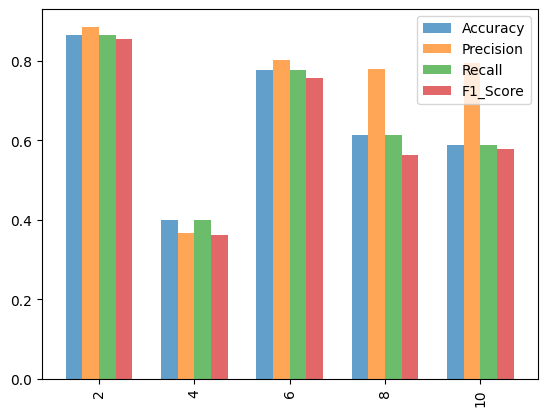

In [40]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.


In [41]:
#Take 4 Clients, one of them is assumed dishonest

# Split data into 4 clients
# Create and train client models
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [42]:
Client_2[1].size

15000

In [43]:
Client_2[1]

array([5, 1, 1, ..., 6, 7, 1], dtype=uint8)

In [44]:
### Client_2 is assumed dishonest and changing the training data. Some labels are set as 4
### Change the first 2000 labels

Client_2[1][:2000] = 3

In [45]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)


(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [46]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])

In [47]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [48]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 2.2395 - accuracy: 0.3287 - 677ms/epoch - 2ms/step
Test accuracy: 0.3287000060081482
313/313 [==============================] - 1s 1ms/step
(10000, 10)
Accuracy test set:  0.3287
Precision test set:  0.34375907027587305
Recall test set:  0.3287
F-score test set:  0.3086619721089325
              precision    recall  f1-score   support

           0       0.10      0.05      0.07       980
           1       0.36      0.30      0.33      1135
           2       0.48      0.33      0.39      1032
           3       0.21      0.25      0.23      1010
           4       0.21      0.08      0.12       982
           5       0.75      0.20      0.32       892
           6       0.36      0.54      0.43       958
           7       0.49      0.74      0.59      1028
           8       0.27      0.48      0.34       974
           9       0.24      0.29      0.26      1009

    accuracy                           0.33     10000
   macro avg       0.35      0.33      0.31   

In [49]:
test_accuracy_dishonest  = []
test_precision_dishonest = []
test_recall_dishonest    = []
test_f1_score_dishonest  = []

In [50]:
test_accuracy_dishonest.append(test_accuracy[1])
test_precision_dishonest.append(test_precision[1])
test_recall_dishonest.append(test_recall[1])
test_f1_score_dishonest.append(test_f1_score[1])

test_accuracy_dishonest.append(0.10090000182390213)
test_precision_dishonest.append(0.29096004180672663)
test_recall_dishonest.append(0.1009)
test_f1_score_dishonest.append(0.03971524584975824)

print(test_accuracy_dishonest)
print(test_precision_dishonest)
print(test_recall_dishonest)
print(test_f1_score_dishonest)

[0.3984000086784363, 0.10090000182390213]
[0.36756040425356656, 0.29096004180672663]
[0.3984, 0.1009]
[0.36215371297003246, 0.03971524584975824]


In [51]:
### Plot the model's performance for the 6 clients, one of them (number=2) is dishonest

ErrorMetrics = []
ErrorMetrics.append(test_accuracy_dishonest)
ErrorMetrics.append(test_precision_dishonest)
ErrorMetrics.append(test_recall_dishonest)
ErrorMetrics.append(test_f1_score_dishonest)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = ['All are honest', '#2 is dishonest']
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.3984000086784363, 0.10090000182390213], [0.36756040425356656, 0.29096004180672663], [0.3984, 0.1009], [0.36215371297003246, 0.03971524584975824]]


,Accuracy,Precision,Recall,F1_Score
All are honest,0.3984,0.36756,0.3984,0.362154
#2 is dishonest,0.1009,0.29096,0.1009,0.039715


<Axes: >

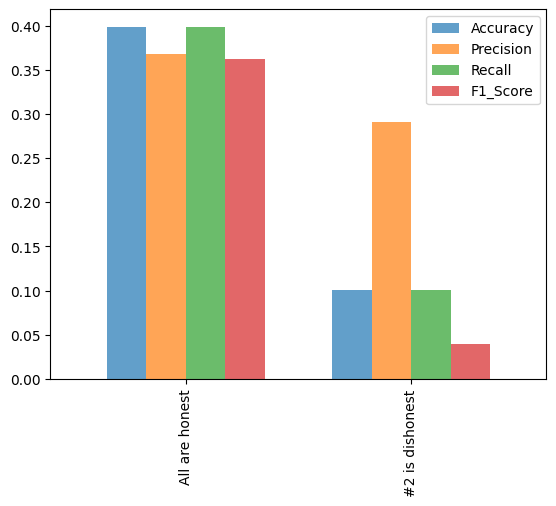

In [52]:

ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

# Challenges (Optional):

## The above code is for one communication round. Write code for multiple communication rounds. In each communication round, clients will train the model on a new dataset. Then the server will merge all these models. Subsequently, the clients will retrain the merged model in the next communication round.

